<a href="https://colab.research.google.com/github/Sai25Hajime/CognifyZTech_Level1_Task2/blob/main/CognifyZTech_Level1_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting the Google Drive

First we mount the google drive since that is where the dataset will be stored.

In [40]:
#Both are used to import the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

Importing libraries is standard practice when coding or working with datasets. In this case we are importing the Pandas, MatPlotlib and Seaborn libraries.

In [41]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the Dataset

Now we load the dataset. Since we have uploaded it from Google Drive. We need to put that path instead of the local path.

In [42]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/cognifyz_dataset.csv")

# Displaying Basic Information

This gives us information about the dataset ranging from number of rows and columns as well as what they contain and their data types.

In [43]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch 

In [44]:
# Numerical Analysis: Mean, Median, Mode, Standard Deviation
numerical_columns = df.select_dtypes(include=[np.number])  # Selecting only numerical columns

# Compute descriptive statistics
numerical_stats = numerical_columns.describe()  # Provides count, mean, std, min, 25%, 50% (median), 75%, max
mean_values = numerical_columns.mean()  # Mean
median_values = numerical_columns.median()  # Median
mode_values = numerical_columns.mode().iloc[0]  # Mode might return multiple values, taking the first
std_values = numerical_columns.std()  # Standard deviation

# Display Summary Statistics

Summary Statistics describes our datase in detail.

In [45]:
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(numerical_stats)


Summary Statistics:
       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000

In [46]:
print("\n🔹 Mean Values:")
print(mean_values)

print("\n🔹 Median Values:")
print(median_values)

print("\n🔹 Mode Values:")
print(mode_values)

print("\n🔹 Standard Deviation Values:")
print(std_values)


🔹 Mean Values:
Restaurant ID           9.051128e+06
Country Code            1.836562e+01
Longitude               6.412657e+01
Latitude                2.585438e+01
Average Cost for two    1.199211e+03
Price range             1.804837e+00
Aggregate rating        2.666370e+00
Votes                   1.569097e+02
dtype: float64

🔹 Median Values:
Restaurant ID           6.004089e+06
Country Code            1.000000e+00
Longitude               7.719196e+01
Latitude                2.857047e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64

🔹 Mode Values:
Restaurant ID            53.0
Country Code              1.0
Longitude                 0.0
Latitude                  0.0
Average Cost for two    500.0
Price range               1.0
Aggregate rating          0.0
Votes                     0.0
Name: 0, dtype: float64

🔹 Standard Deviation Values:
Restaurant ID           8.791521e+

# Categorical Variable Distribution

Categorical variables represent data that can be sorted into distinct groups or categories. Here the Country Code, City and Cusinies have been categorized.

In [47]:
# Distribution of categorical variables
categorical_columns = ["Country Code", "City", "Cuisines"]  # Modify as needed
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts())


Country Code Distribution:
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: count, dtype: int64

City Distribution:
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64

Cuisines Distribution:
Cuisines
North Indian                          936
North Indian, Chinese                 511
Chinese                               354
Fast Food                             354
North Indian, Mughlai                 334
                                     ... 
World Cuisine, Patisserie, Cafe         1
Burger, Izgara                          1
Desserts, B�_rek                        1
Restaurant Cafe, Turkish,

# Plotting the Cities with Highest Number of Restaurants

Here we use Seaborn Barplot and Matplotlib Plot to show top cities with the highest number of restaurants.

<ipython-input-48-82148e37f230>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


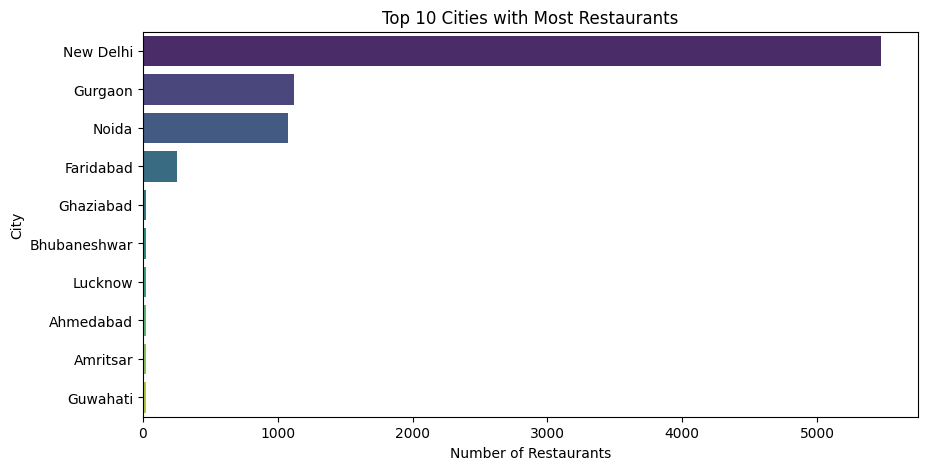

In [48]:
# Top Cities with Highest Number of Restaurants
top_cities = df["City"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.title("Top 10 Cities with Most Restaurants")
plt.show()

# Calculating the Highest Occurrences

We plot the 10 most popular cuisines that our country has to offer.

<ipython-input-49-1eb391f6701e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="coolwarm")


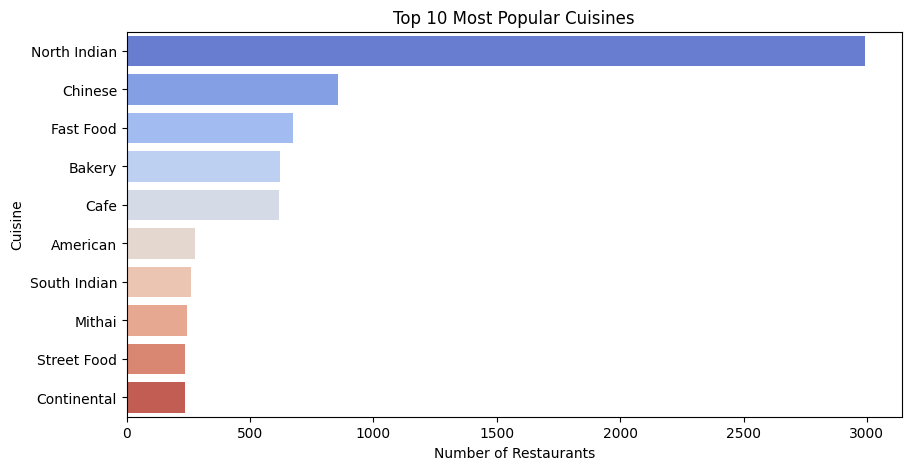

In [49]:
# Top Cuisines with Highest Occurrences
df["Cuisines"] = df["Cuisines"].astype(str)  # Convert to string if needed
df["Cuisines"] = df["Cuisines"].apply(lambda x: x.split(",")[0])  # Take the first cuisine type
top_cuisines = df["Cuisines"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette="coolwarm")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.title("Top 10 Most Popular Cuisines")
plt.show()